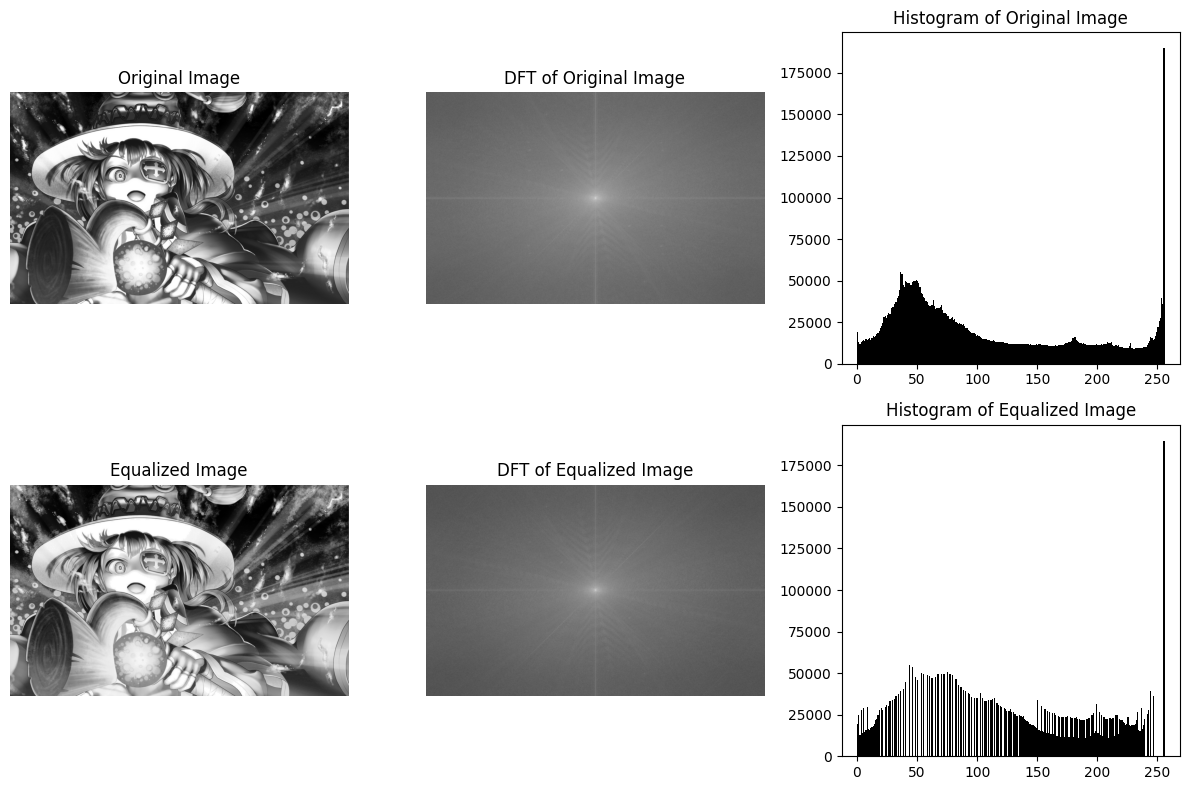

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"/content/21597.jpg", cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)
dft_original = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_original_shifted = np.fft.fftshift(dft_original)
magnitude_original = cv2.magnitude(dft_original_shifted[:,:,0], dft_original_shifted[:,:,1])
magnitude_original_log =np.log(magnitude_original + 1)
dft_equalized = cv2.dft(np.float32(equalized_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_equalized_shifted = np.fft.fftshift(dft_equalized)
magnitude_equalized = cv2.magnitude(dft_equalized_shifted[:,:,0], dft_equalized_shifted[:,:,1])
magnitude_equalized_log = np.log(magnitude_equalized + 1)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(magnitude_original_log, cmap='gray')
plt.title('DFT of Original Image')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram of Original Image')
plt.subplot(2, 3, 4)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(magnitude_equalized_log, cmap='gray')
plt.title('DFT of Equalized Image')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Histogram of Equalized Image')
plt.tight_layout()
plt.show()


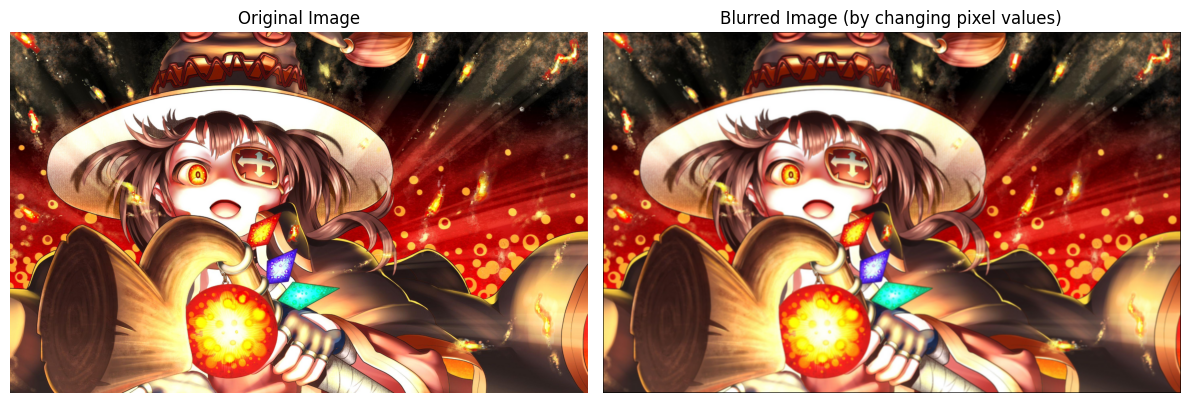

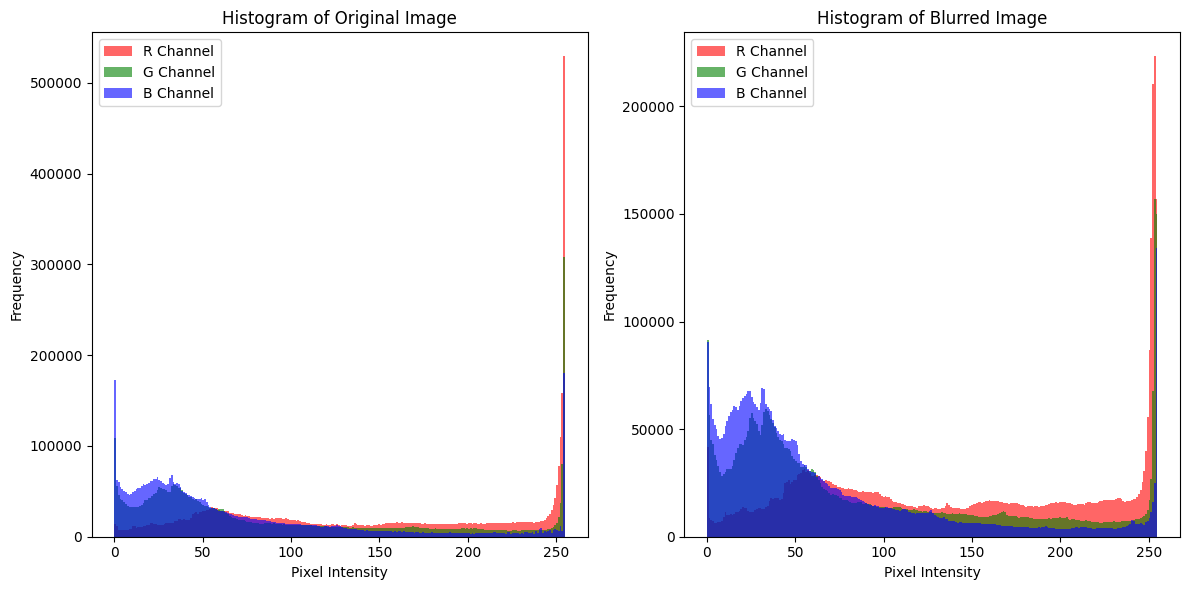

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"/content/21597.jpg")
height, width, channels = image.shape
blurred_image = np.zeros_like(image)

kernel_size = 7
kernel_radius = kernel_size // 2

for i in range(kernel_radius, height - kernel_radius):
    for j in range(kernel_radius, width - kernel_radius):
        for c in range(channels):
            region = image[i - kernel_radius:i + kernel_radius + 1,
                           j - kernel_radius:j + kernel_radius + 1,
                           c]
            blurred_image[i, j, c] = np.mean(region)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image (by changing pixel values)')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        ax.hist(image_rgb[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image, axes[0], 'Histogram of Original Image')
plot_histogram(blurred_image, axes[1], 'Histogram of Blurred Image')

plt.tight_layout()
plt.show()


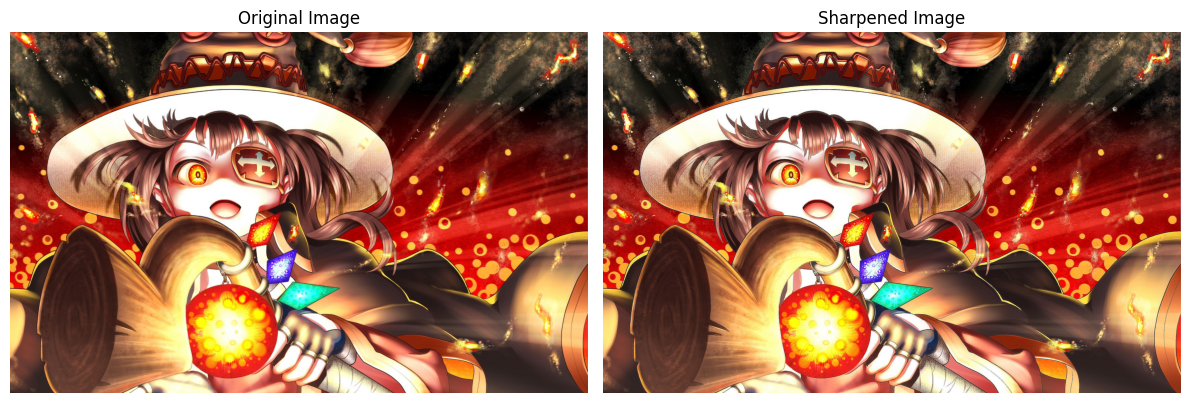

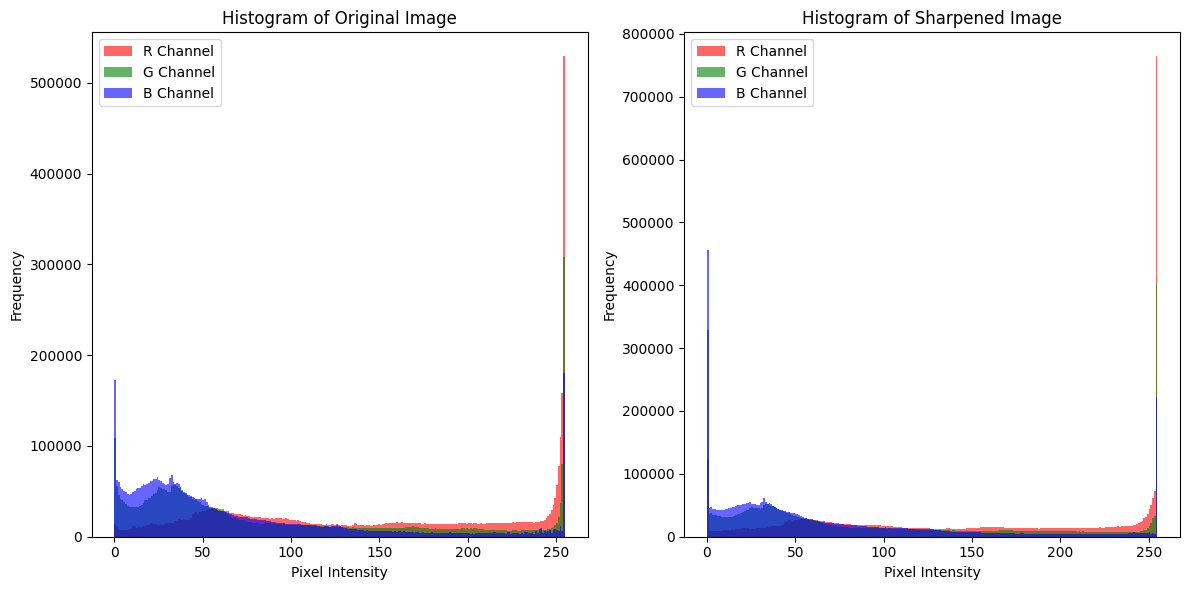

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"/content/21597.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
sharpened_image_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_rgb)
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')
plot_histogram(sharpened_image_rgb, axes[1], 'Histogram of Sharpened Image')

plt.tight_layout()
plt.show()


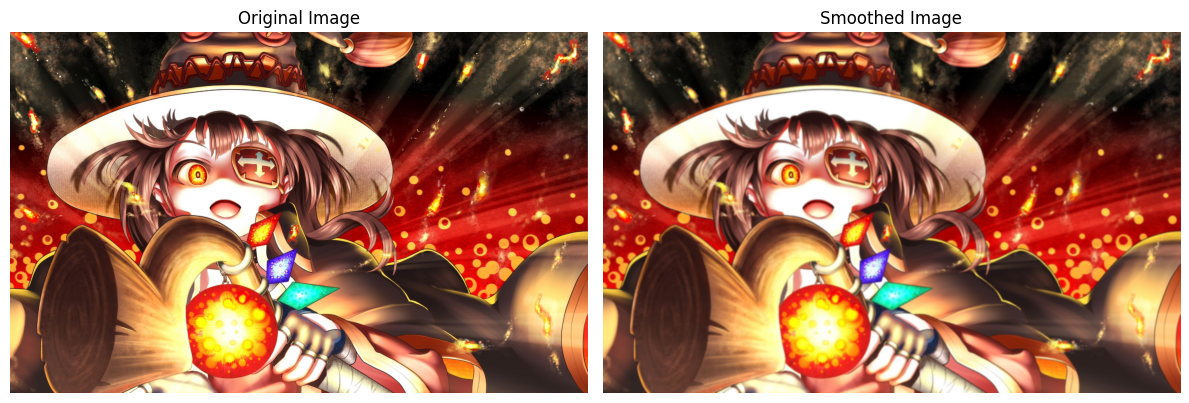

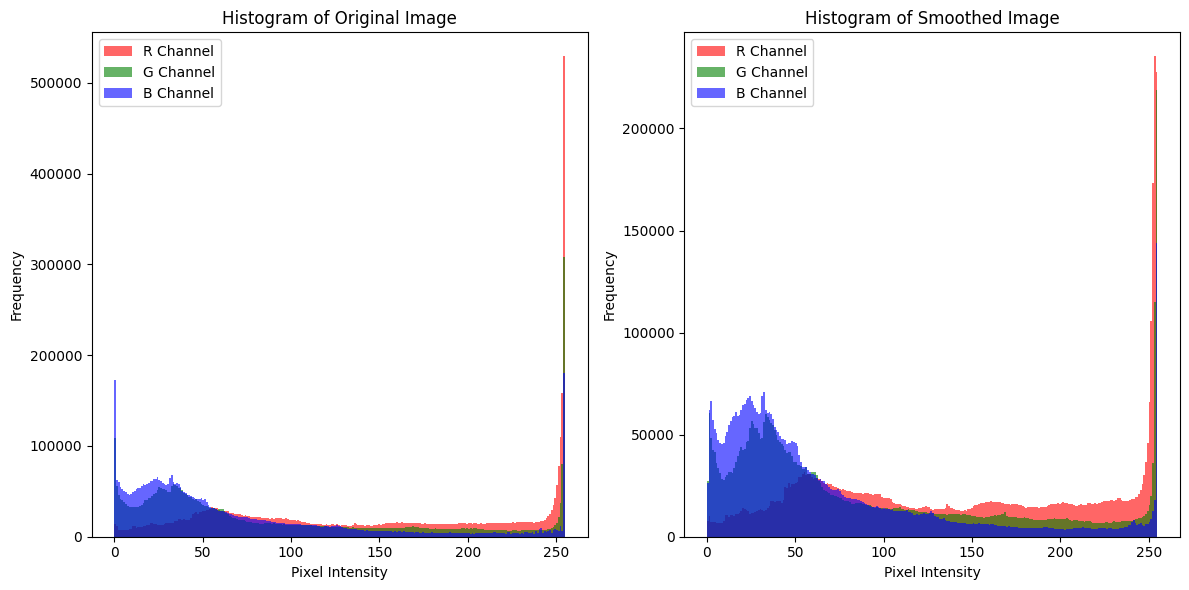

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"/content/21597.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

smoothed_image = cv2.GaussianBlur(image, (15, 15), 0)
smoothed_image_rgb = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image_rgb)
plt.title('Smoothed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')
plot_histogram(smoothed_image_rgb, axes[1], 'Histogram of Smoothed Image')

plt.tight_layout()
plt.show()


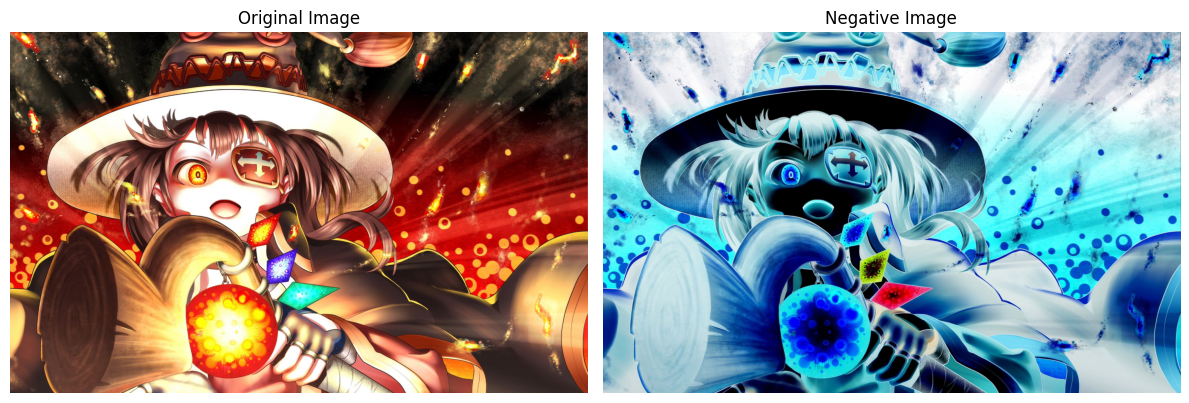

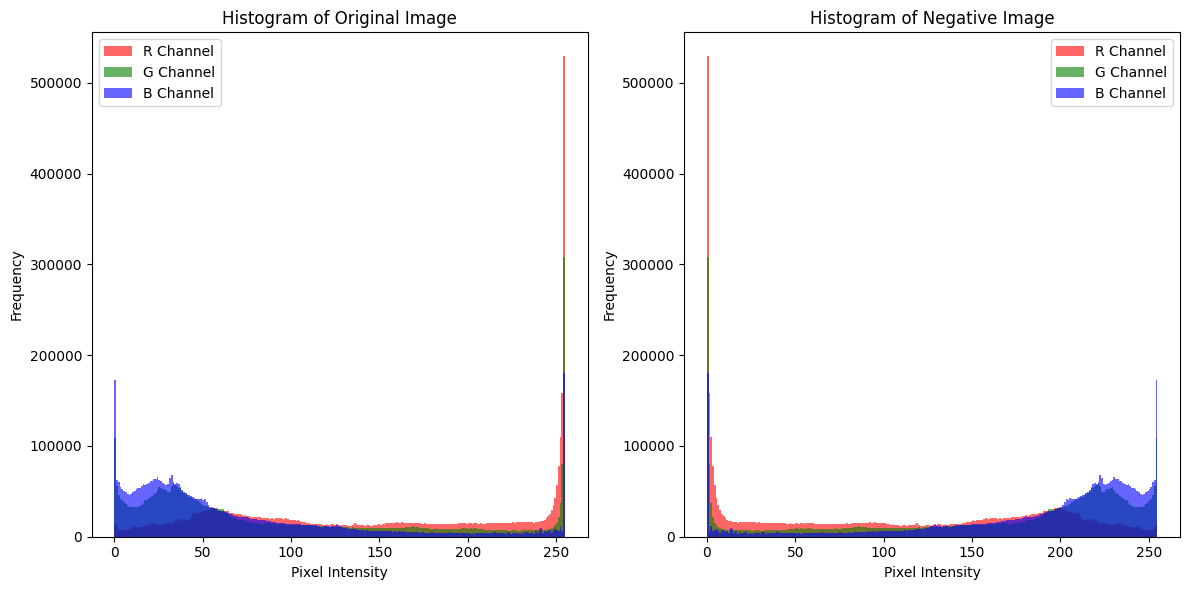

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"/content/21597.jpg")  # Update path as needed
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

negative_image = 255 - image
negative_image_rgb = cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_image_rgb)
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')
plot_histogram(negative_image_rgb, axes[1], 'Histogram of Negative Image')

plt.tight_layout()
plt.show()


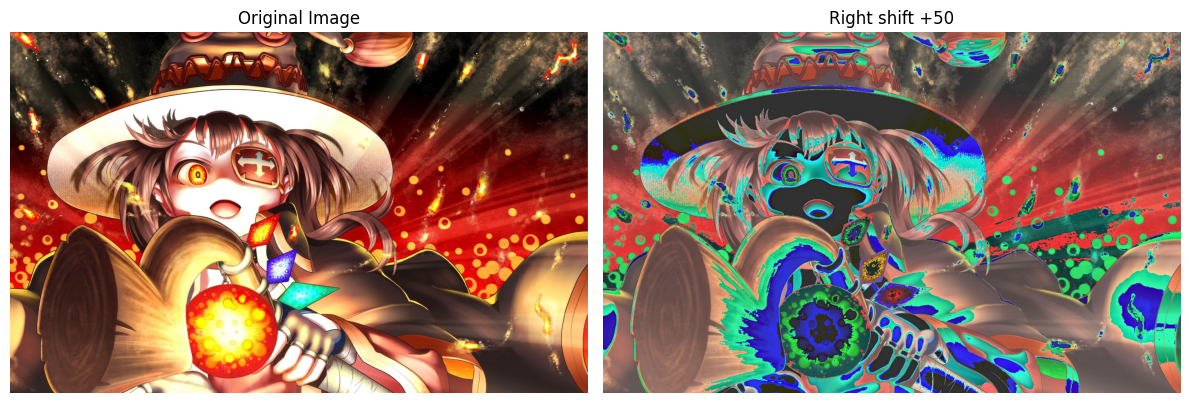

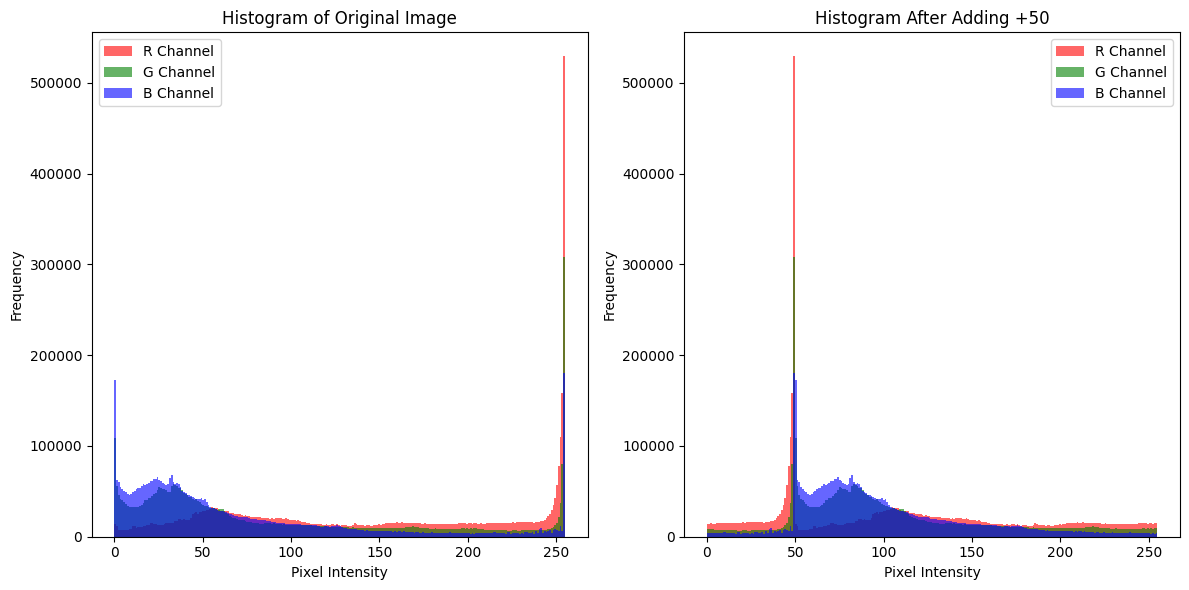

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"/content/21597.jpg")  # Update path as needed
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

increased_image = np.clip(image + 50, 0, 255).astype(np.uint8)
increased_image_rgb = cv2.cvtColor(increased_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(increased_image_rgb)
plt.title('Right shift +50')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histogram(image, ax, title):
    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')
plot_histogram(increased_image_rgb, axes[1], 'Histogram After Adding +50')

plt.tight_layout()
plt.show()


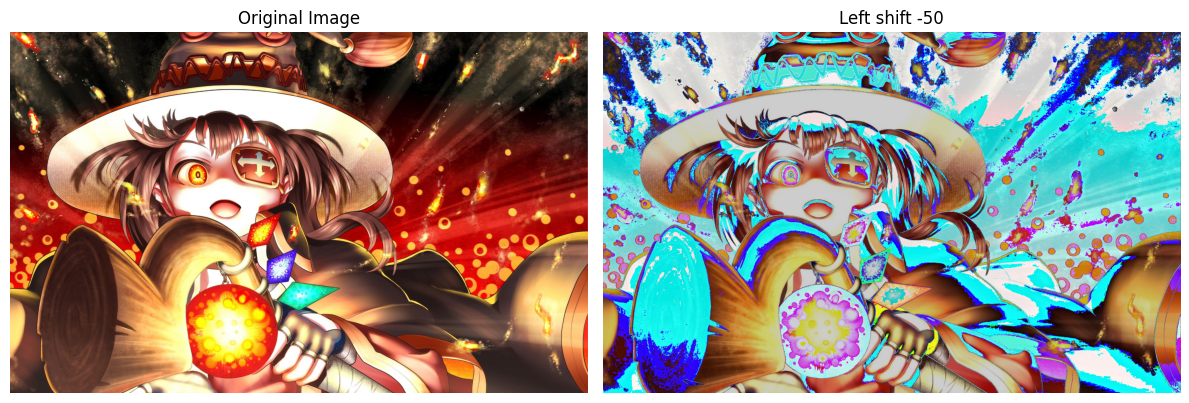

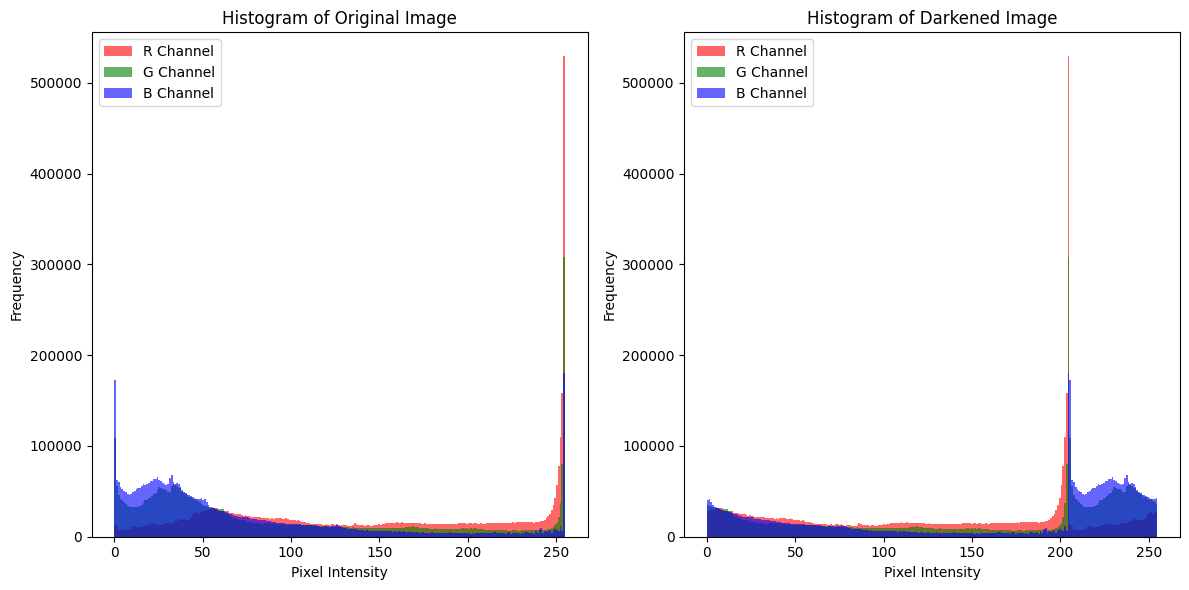

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in color
image = cv2.imread(r"/content/21597.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Darken the image by subtracting 50 from each channel
darkened_image = np.clip(image - 50, 0, 255).astype(np.uint8)
darkened_image_rgb = cv2.cvtColor(darkened_image, cv2.COLOR_BGR2RGB)

# Display the original and darkened images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(darkened_image_rgb)
plt.title('Left shift -50')
plt.axis('off')

plt.tight_layout()
plt.show()

# Function to plot histograms for each channel
def plot_histogram(image, ax, title):
    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        ax.hist(image[:, :, i].flatten(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} Channel')
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.legend()

# Plot histograms of original and darkened images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(image_rgb, axes[0], 'Histogram of Original Image')
plot_histogram(darkened_image_rgb, axes[1], 'Histogram of Darkened Image')

plt.tight_layout()
plt.show()


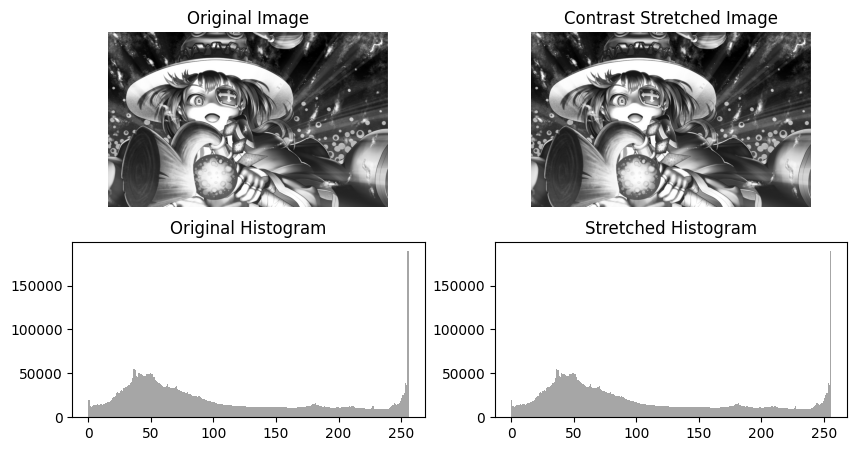

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = '/content/21597.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image was loaded correctly
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Define new min and max intensity values
    new_min, new_max = 0, 255

    # Apply contrast stretching using OpenCV's normalization function
    stretched_img = cv2.normalize(img, None, new_min, new_max, cv2.NORM_MINMAX)

    # Display the original and stretched images
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(stretched_img, cmap='gray')
    plt.title('Contrast Stretched Image')
    plt.axis('off')

    # Plot histograms
    plt.subplot(2, 2, 3)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title('Original Histogram')

    plt.subplot(2, 2, 4)
    plt.hist(stretched_img.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    plt.title('Stretched Histogram')

    plt.show()

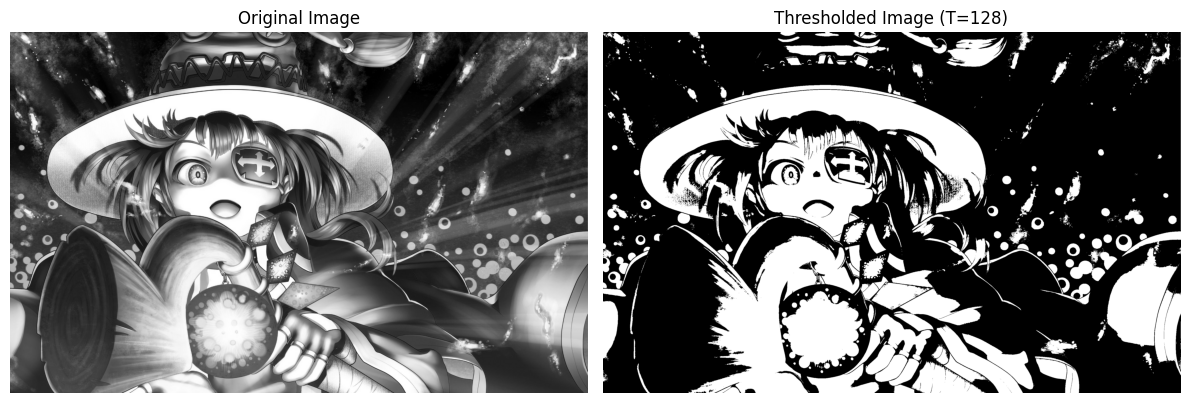

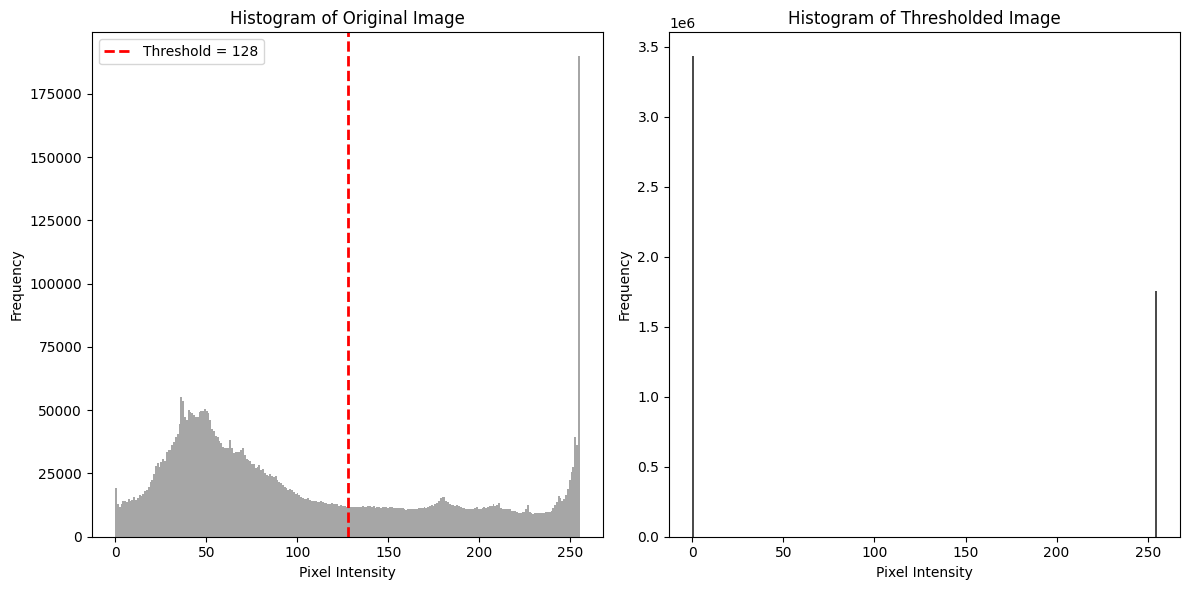

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r"/content/21597.jpg", cv2.IMREAD_GRAYSCALE)

# Apply global thresholding (Threshold value = 128)
threshold_value = 128
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Thresholded Image (T={threshold_value})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot Histograms
plt.figure(figsize=(12, 6))

# Histogram of the Original Image
plt.subplot(1, 2, 1)
plt.hist(image.flatten(), bins=256, color='gray', alpha=0.7)
plt.axvline(threshold_value, color='red', linestyle='dashed', linewidth=2, label=f'Threshold = {threshold_value}')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Histogram of the Thresholded Image
plt.subplot(1, 2, 2)
plt.hist(thresholded_image.flatten(), bins=256, color='black', alpha=0.7)
plt.title('Histogram of Thresholded Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
